<a href="https://colab.research.google.com/github/naveen959/Goeduhub/blob/main/Task8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task-8**
**Name - T. Naveen**

**Reg no - GO_STP_13234**

#**Predicting a Startups Profit/Success Rate using Multiple Linear Regression in Python**

**Here 50 startups dataset containing 5 columns  like “R&D Spend”, “Administration”, “Marketing Spend”, “State”, “Profit”.**

**In this dataset first 3 columns provides you spending on Research , Administration and Marketing respectively. State indicates startup based on that state. Profit indicates how much profits earned by a startup.**

**Clearly, we can understand that it is a multiple linear regression problem, as the independent variables are more than one.**

**Prepare a prediction model for profit of 50_Startups data in Python**

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression

In [76]:
df = pd.read_csv('50_Startups.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [77]:
df.keys()

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [78]:
df.shape

(50, 5)

In [79]:
print(df.Administration)

0     136897.80
1     151377.59
2     101145.55
3     118671.85
4      91391.77
5      99814.71
6     147198.87
7     145530.06
8     148718.95
9     108679.17
10    110594.11
11     91790.61
12    127320.38
13    135495.07
14    156547.42
15    122616.84
16    121597.55
17    145077.58
18    114175.79
19    153514.11
20    113867.30
21    153773.43
22    122782.75
23    105751.03
24     99281.34
25    139553.16
26    144135.98
27    127864.55
28    182645.56
29    153032.06
30    115641.28
31    152701.92
32    129219.61
33    103057.49
34    157693.92
35     85047.44
36    127056.21
37     51283.14
38     65947.93
39     82982.09
40    118546.05
41     84710.77
42     96189.63
43    127382.30
44    154806.14
45    124153.04
46    115816.21
47    135426.92
48     51743.15
49    116983.80
Name: Administration, dtype: float64


In [80]:
print(df['R&D Spend'])

0     165349.20
1     162597.70
2     153441.51
3     144372.41
4     142107.34
5     131876.90
6     134615.46
7     130298.13
8     120542.52
9     123334.88
10    101913.08
11    100671.96
12     93863.75
13     91992.39
14    119943.24
15    114523.61
16     78013.11
17     94657.16
18     91749.16
19     86419.70
20     76253.86
21     78389.47
22     73994.56
23     67532.53
24     77044.01
25     64664.71
26     75328.87
27     72107.60
28     66051.52
29     65605.48
30     61994.48
31     61136.38
32     63408.86
33     55493.95
34     46426.07
35     46014.02
36     28663.76
37     44069.95
38     20229.59
39     38558.51
40     28754.33
41     27892.92
42     23640.93
43     15505.73
44     22177.74
45      1000.23
46      1315.46
47         0.00
48       542.05
49         0.00
Name: R&D Spend, dtype: float64


In [81]:
print(df['Marketing Spend'])

0     471784.10
1     443898.53
2     407934.54
3     383199.62
4     366168.42
5     362861.36
6     127716.82
7     323876.68
8     311613.29
9     304981.62
10    229160.95
11    249744.55
12    249839.44
13    252664.93
14    256512.92
15    261776.23
16    264346.06
17    282574.31
18    294919.57
19         0.00
20    298664.47
21    299737.29
22    303319.26
23    304768.73
24    140574.81
25    137962.62
26    134050.07
27    353183.81
28    118148.20
29    107138.38
30     91131.24
31     88218.23
32     46085.25
33    214634.81
34    210797.67
35    205517.64
36    201126.82
37    197029.42
38    185265.10
39    174999.30
40    172795.67
41    164470.71
42    148001.11
43     35534.17
44     28334.72
45      1903.93
46    297114.46
47         0.00
48         0.00
49     45173.06
Name: Marketing Spend, dtype: float64


In [82]:
print(df['State'])

0       New York
1     California
2        Florida
3       New York
4        Florida
5       New York
6     California
7        Florida
8       New York
9     California
10       Florida
11    California
12       Florida
13    California
14       Florida
15      New York
16    California
17      New York
18       Florida
19      New York
20    California
21      New York
22       Florida
23       Florida
24      New York
25    California
26       Florida
27      New York
28       Florida
29      New York
30       Florida
31      New York
32    California
33       Florida
34    California
35      New York
36       Florida
37    California
38      New York
39    California
40    California
41       Florida
42    California
43      New York
44    California
45      New York
46       Florida
47    California
48      New York
49    California
Name: State, dtype: object


In [83]:
print(df['Profit'])

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64


In [84]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [85]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df.State = label_encoder.fit_transform(df.State)
df.State.unique()

array([2, 0, 1])

In [86]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [87]:
y = df['Profit']

In [88]:
x = df.drop('Profit',axis=1)

print(x.head())
print(y.head())

   R&D Spend  Administration  Marketing Spend  State
0  165349.20       136897.80        471784.10      2
1  162597.70       151377.59        443898.53      0
2  153441.51       101145.55        407934.54      1
3  144372.41       118671.85        383199.62      2
4  142107.34        91391.77        366168.42      1
0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64


In [89]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.50,random_state=7)

In [90]:
lm = LinearRegression()
lm.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
lm.predict(xtrain)

array([113742.16251076, 164018.94026441, 128374.73923157,  49040.18807627,
       155803.48968336,  83442.73637147,  71388.50947938, 131044.14928522,
       194490.90291859, 160007.53357681,  47600.53710491,  61691.71881518,
       110501.29092337,  44701.39712538, 154169.93950775,  62630.38987488,
       149971.42535304, 103134.47683401,  78844.39012294, 108376.74331174,
       118190.23704436, 174906.12609727,  99645.35864212, 169919.06609046,
        43718.77175474])

In [92]:
y_pred_train = lm.predict(xtrain)
y_pred_test = lm.predict(xtest)

In [93]:
df = pd.DataFrame(y_pred_test,ytest)
df.head()

,0
Profit,
134307.35,124749.295869
129917.04,147585.514741
110352.25,113780.376412
71498.49,66274.504976
99937.59,98182.172295


In [94]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest,y_pred_test)
print(mse)

72972875.77889921


In [95]:
y_pred = lm.predict(xtest)
print(y_pred)
print(ytest)

[124749.29586895 147585.51474072 113780.37641173  66274.5049761
  98182.17229486 116014.29396524 187089.90594219 113035.40183179
 134053.21014099  74525.25527452  95962.58583842  54982.32261342
  87215.19095436 127726.41603216 132474.48743859  90338.65736395
 104367.16289873  72301.13807676 151051.12125977 180332.12701498
  96165.86769913 113617.3060071  119968.06678886 100243.29749381
  68748.66864329]
13    134307.35
15    129917.04
22    110352.25
42     71498.49
30     99937.59
27    105008.31
1     191792.06
20    118474.03
10    146121.95
36     90708.19
32     97427.84
46     49490.75
34     96712.80
18    124266.90
17    125370.37
35     96479.51
29    101004.64
41     77798.83
9     149759.96
2     191050.39
33     96778.92
16    126992.93
21    111313.02
31     97483.56
38     81229.06
Name: Profit, dtype: float64


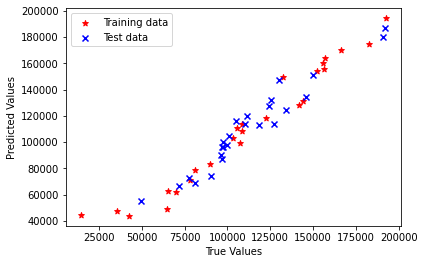

In [96]:
plt.scatter(ytrain,y_pred_train,c='Red',marker='*')
plt.scatter(ytest,y_pred_test,c='Blue',marker='x')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend(['Training data','Test data'],loc='upper left')
plt.show()